## Загрузка библиотек и объявление функций

In [2]:
%pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import OrdinalEncoder

In [4]:
def fillna_num_features(df, num_column):
    df[num_column] = df[num_column].fillna(df[num_column].median())

## Загрузка данных

In [5]:
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets

In [6]:
X['num'] = y['num']

# Исследование исходных данных

Датасет содержит следующие поля:

1) age (возраст)

Возраст пациента в годах.

2) sex (пол)

* Пол пациента:

    1 = мужской

    0 = женский

3) cp (тип боли в груди, chest pain type)

* Тип боли в груди, которую испытывает пациент:

    0 = типичная стенокардия

    1 = атипичная стенокардия

    2 = боль, не связанная со стенокардией

    3 = отсутствие боли

4) trestbps (артериальное давление в состоянии покоя, resting blood pressure)

* Артериальное давление пациента в состоянии покоя (в мм рт. ст.).

5) chol (холестерин, serum cholesterol)

* Уровень холестерина в крови (в мг/дл).

6) fbs (уровень сахара в крови натощак, fasting blood sugar)

* Уровень сахара в крови натощак:

    1 = уровень сахара > 120 мг/дл

    0 = уровень сахара <= 120 мг/дл

7) restecg (результаты электрокардиографии в состоянии покоя, resting electrocardiographic results)

* Результаты ЭКГ в состоянии покоя:

    0 = норма

    1 = наличие аномалий (например, гипертрофия левого желудочка)

    2 = значительные аномалии

8) thalach (максимальная частота сердечных сокращений, maximum heart rate achieved)

* Максимальная частота сердечных сокращений, достигнутая во время теста.

9) exang (стенокардия, вызванная физической нагрузкой, exercise-induced angina)

* Наличие стенокардии, вызванной физической нагрузкой:

    1 = да

    0 = нет

10) oldpeak (депрессия сегмента ST, ST depression induced by exercise relative to rest)

* Депрессия сегмента ST, вызванная физической нагрузкой, по сравнению с состоянием покоя (измеряется в милливольтах).

11) slope (наклон сегмента ST, slope of the peak exercise ST segment)

* Наклон сегмента ST во время пиковой нагрузки:

    0 = восходящий

    1 = плоский

    2 = нисходящий

12) ca (количество основных сосудов, number of major vessels colored by fluoroscopy)

* Количество основных сосудов, окрашенных при флюороскопии (значения от 0 до 3).

13) thal (талассемия, thalassemia)

* Результаты теста на талассемию:
  
    3 = норма

    6 = фиксированный дефект

    7 = обратимый дефект

1)  num (целевая переменная, diagnosis of heart disease)

* Диагноз сердечного заболевания:

    0 = отсутствие заболевания

    1, 2, 3, 4 = степень заболевания (чем выше значение, тем тяжелее заболевание)



In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [8]:
X.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


In [9]:
for column in X.select_dtypes(['float64']):
    print(column, X[column].unique())

oldpeak [2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 3.1 0.4 1.3 0.  0.5 1.6 1.  1.2 0.2 1.8
 3.2 2.4 2.  2.5 2.2 2.8 3.  3.4 6.2 4.  5.6 2.9 0.1 2.1 1.9 4.2 0.9 1.1
 3.8 0.7 0.3 4.4]
ca [ 0.  3.  2.  1. nan]
thal [ 6.  3.  7. nan]


<font size=4><b>Получили следующую характеристику исходных данных:</b>

- в столбцах 'ca', 'thal' отсутствуют значения;
- тип данных столбцов 'ca', 'thal' нужно перевести в целочисленный
</font>

## Обработка пропусков

In [10]:
X.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

Можем заметить где у нас пропуски: 'ca', 'thal'. Заменим вещественные признаки медианой

In [11]:
for feature in ['ca', 'thal']:
    fillna_num_features(X, feature)

In [12]:
X.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

## Коррекция типов данных

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [14]:
X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


Можно заметить, что наши фичи ca, thal, sex, slope, cp, fbs, restecg, exang нужно преобразовать в тип int8 так как он занимает меньше памяти. Преобразуем в тип - int8, так как наш максимум это 7.

In [15]:
for column in ['ca', 'thal', 'sex', 'cp', 'slope', 'fbs', 'restecg', 'exang']:
    X[column] = X[column].astype('int8')

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int8   
 2   cp        303 non-null    int8   
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int8   
 6   restecg   303 non-null    int8   
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int8   
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int8   
 11  ca        303 non-null    int8   
 12  thal      303 non-null    int8   
 13  num       303 non-null    int64  
dtypes: float64(1), int64(5), int8(8)
memory usage: 16.7 KB


## Обогащение данных

In [17]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


Сделаем новый призак, который будет характеризовать соотношение артериального давления к уровню холестерина.

In [18]:
X['the_ratio_of_trestbps_to_chol'] = X['trestbps'] / X['chol']
X['the_ratio_of_trestbps_to_chol'].head()

0    0.622318
1    0.559441
2    0.524017
3    0.520000
4    0.637255
Name: the_ratio_of_trestbps_to_chol, dtype: float64

Сделаем новый призак, который будет характеризовать уровень опасности.

danger_level = cp + fbs + restecg + exang + slope + ca

In [19]:
X['danger_level'] = X['cp'] + X['fbs'] + X['restecg'] + X['exang'] + X['slope'] + X['ca']
X['danger_level'].head()

0     7
1    12
2    11
3     6
4     5
Name: danger_level, dtype: int8

## Проверка "очищенных" данных

Проверим наличие дубликатов

In [20]:
X.duplicated().sum()

0

Повторяющихся записей нету

In [21]:
X.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,the_ratio_of_trestbps_to_chol,danger_level
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,0.622318,7
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,0.559441,12
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,0.524017,11
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,0.520000,6
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,0.637255,5
5,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0,0.508475,3
6,62,0,4,140,268,0,2,160,0,3.6,3,2,3,3,0.522388,11
7,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0,0.338983,6
8,63,1,4,130,254,0,2,147,0,1.4,2,1,7,2,0.511811,9
9,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1,0.689655,11


In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            303 non-null    int64  
 1   sex                            303 non-null    int8   
 2   cp                             303 non-null    int8   
 3   trestbps                       303 non-null    int64  
 4   chol                           303 non-null    int64  
 5   fbs                            303 non-null    int8   
 6   restecg                        303 non-null    int8   
 7   thalach                        303 non-null    int64  
 8   exang                          303 non-null    int8   
 9   oldpeak                        303 non-null    float64
 10  slope                          303 non-null    int8   
 11  ca                             303 non-null    int8   
 12  thal                           303 non-null    int

In [23]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,the_ratio_of_trestbps_to_chol,danger_level
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,0.622318,7
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,0.559441,12
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,0.524017,11
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,0.520000,6
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,0.637255,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1,0.416667,3
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2,0.746114,9
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3,0.992366,8
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1,0.550847,7


# EDA

In [24]:
num_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak',
       'the_ratio_of_trestbps_to_chol']

In [25]:
ranked_features = ['cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'danger_level']

In [26]:
nominal_variable = ['sex']

Для начала рассмотрим вещественные признаки

In [27]:
X[num_features].describe()

,age,trestbps,chol,thalach,oldpeak,the_ratio_of_trestbps_to_chol
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604,0.554287
std,9.038662,17.599748,51.776918,22.875003,1.161075,0.127209
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.203901
25%,48.000000,120.000000,211.000000,133.500000,0.000000,0.462529
50%,56.000000,130.000000,241.000000,153.000000,0.800000,0.536965
75%,61.000000,140.000000,275.000000,166.000000,1.600000,0.633946
max,77.000000,200.000000,564.000000,202.000000,6.200000,1.190476


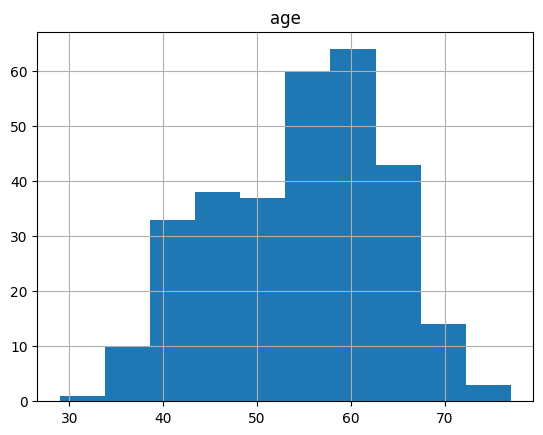

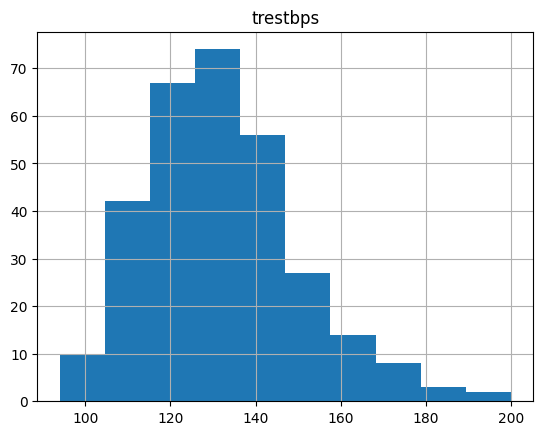

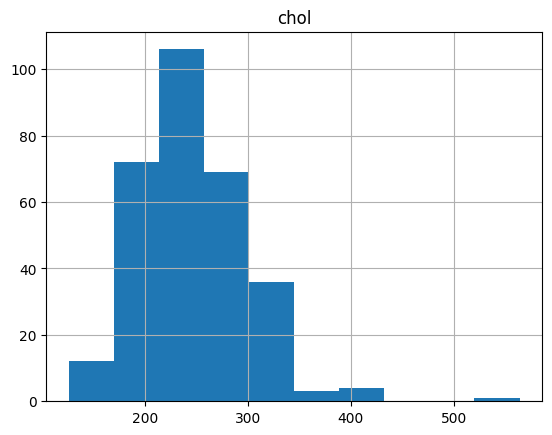

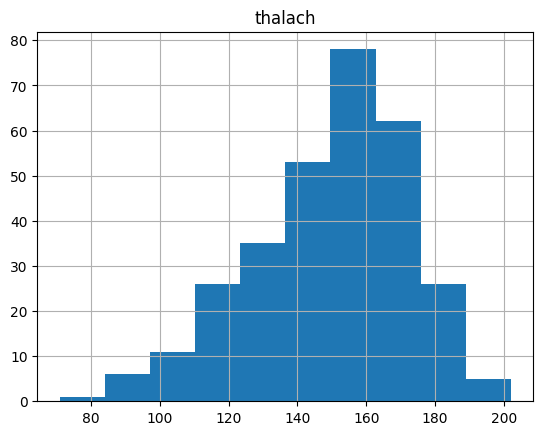

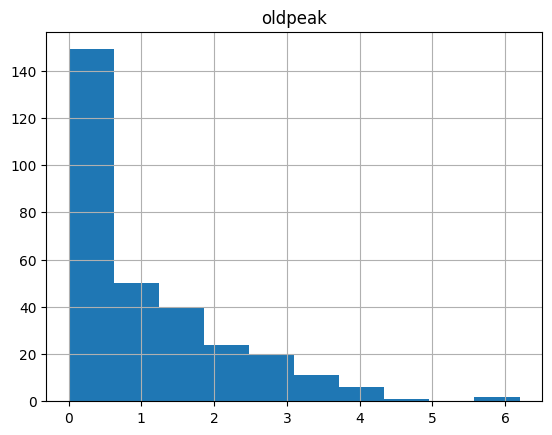

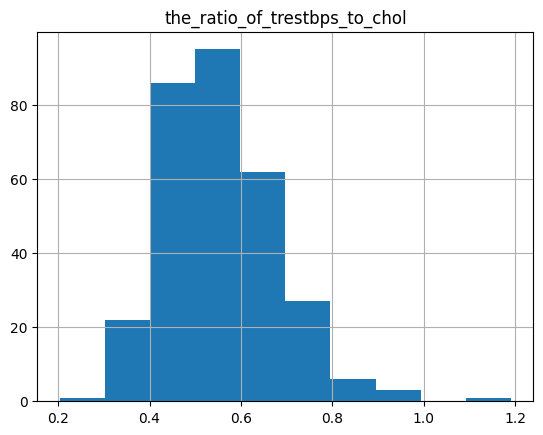

In [28]:
for column in num_features:
    X.hist(column)
    plt.show()


**Заключение:**
- выбросы затрудняют чтение данных о уровне холестерина и депресии сегмента ST;
- на гистограмме данные о уровне холестерина и депресии сегмента ST смещены вправо;
- тогда среднее значение обычно БОЛЬШЕ медианы.

## Изучение и обработка выбросов

Учитывая приведенные выше результаты, столбцы, содержащие выбросы, — это 'chol', 'oldpeak'. Создадим DataFrame без этих выбросов. Выбросы можно идентифицировать путем определения нижнего/верхнего предела нормального диапазона значений.

In [29]:
# Определить по приведенной выше гистограмме столбцы, содержащие выбросы: 'chol', 'oldpeak'.
# Создать Dataframe на основе столбцов с выбросами
outlier = X[['chol','oldpeak']]
outlier

,chol,oldpeak
0,233,2.3
1,286,1.5
2,229,2.6
3,250,3.5
4,204,1.4
...,...,...
298,264,1.2
299,193,3.4
300,131,1.2
301,236,0.0


In [30]:
# Определить нижние пределы для выбросов
Q1 = outlier.quantile(0.25)
Q1

chol       211.0
oldpeak      0.0
Name: 0.25, dtype: float64

In [31]:
# Определить верхние пределы выбросов
Q3 = outlier.quantile(0.75)
Q3

chol       275.0
oldpeak      1.6
Name: 0.75, dtype: float64

In [32]:
# IQR-оценки
IQR = Q3-Q1
# Отфильтрованные данные, из которых удалены выбросы
data_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]
data_filtered

,chol,oldpeak
0,233,2.3
1,286,1.5
2,229,2.6
3,250,3.5
4,204,1.4
...,...,...
298,264,1.2
299,193,3.4
300,131,1.2
301,236,0.0


In [33]:
# Копирование индексов
index_list = list(data_filtered.index)

In [34]:
# Хранить данные без выбросов в отдельном DataFrame.
data_filtered = X[X.index.isin(index_list)]
data_filtered

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,the_ratio_of_trestbps_to_chol,danger_level
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,0.622318,7
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,0.559441,12
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,0.524017,11
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,0.520000,6
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,0.637255,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1,0.416667,3
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2,0.746114,9
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3,0.992366,8
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1,0.550847,7


Новая переменная сохранила отфильтрованные данные без выбросов. Далее отфильтрованные данные будут использоваться для создания гистограммы.

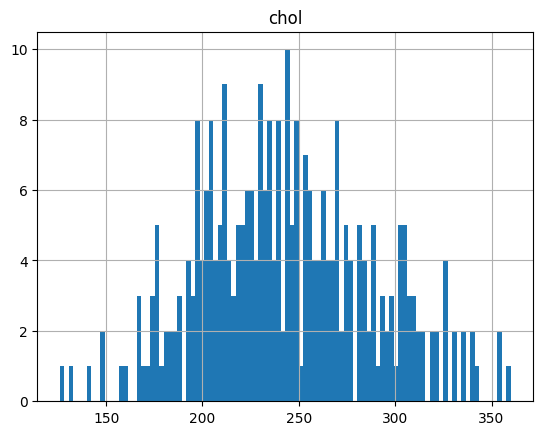

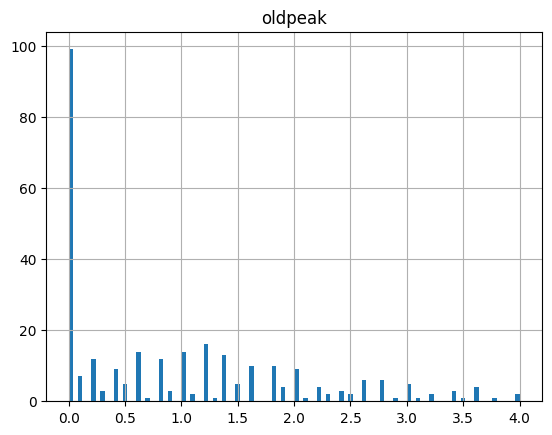

In [35]:
# создать гистограмму с отфильтрованным выбросом
filtered_outlier = data_filtered[['chol','oldpeak']]

for col in filtered_outlier:
    data_filtered.hist(col, bins=100)

**Заключение:**
- Определили нижний и верхний пределы выбросов, определив 25-й и 75-й процентили. Затем нашли межквартильный размах. Использовали эту информацию для фильтрации выбросов. После удаления выбросов график выглядит более симметричным по сравнению с выбросами, и в данных легче наблюдать среднее значение, медиану и моду. Признак oldpeak снизил свое максимальное значение, но смещение все равно вправо.

## Изучение основных параметров без выбросов

В этом разделе отфильтрованные данные будут использоваться для построения новых графиков по сравнению с предыдущими, которые включали выбросы.

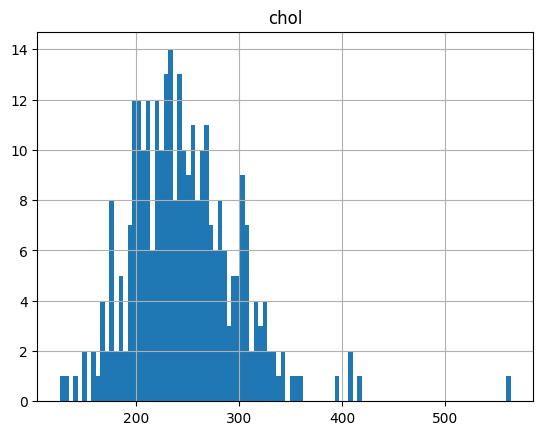

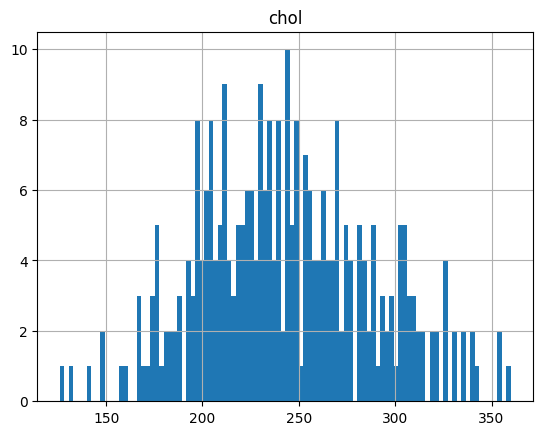

In [36]:
# Сравнение уровня холестерина с выбросами и без них (гистограмма)
X.hist('chol', bins=100)
data_filtered.hist('chol', bins=100)
plt.show()

# **Заключение**:
- Холестериновый выброс был уменьшен с максимального 580 до 370. Гистограммы просты для понимания и могут рассказать многое об уровне холестерина. Среднее значение почти равняется медиане поэтому график имеет около нормальное распределение.

- На гистограмме без выбросов видно, что большая часть уровня холестерина распределена в диапазоне 200 - 300. Максимальный уровень холестерина составляет 370. Для диапазона более 250 значение ниже 8 и уменьшается при увеличении цены до 370. Здесь показано, что  средний уровень холестерина в этом диапазоне (~250). Если больше среднего, значит, человека можно отнести к больному.

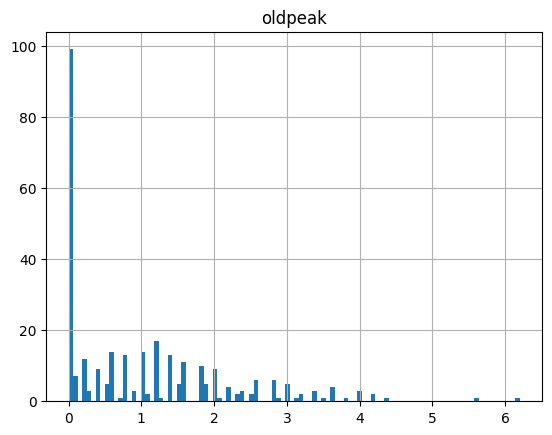

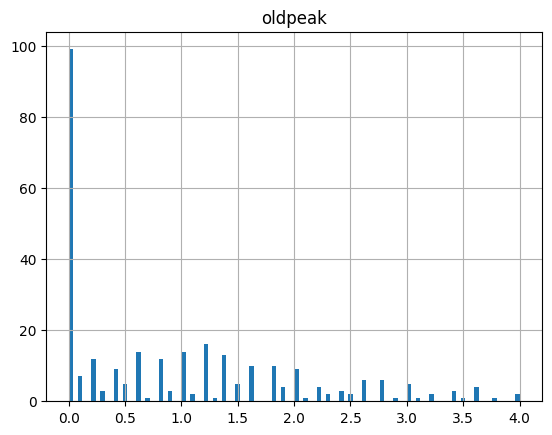

In [37]:
# Сравнение депрессии сегмента ST с выбросами и без них (гистограмма)
X.hist('oldpeak', bins=100)
data_filtered.hist('oldpeak', bins=100)
plt.show()

**Заключение:**
- Выброс по площади дома был уменьшен с максимума 6,2 до 4. Среднее значение по-прежнему гораздо выше медианного, поэтому гистограмма отображается вправо.


- Судя по гистограмме, средняя депрессия сегмента ST (~0). Поэтому можно сказать, что в среднем люди приспособлены к небольшим физическим нагрузкам

## Изучение основных параметров без выбросов

### age

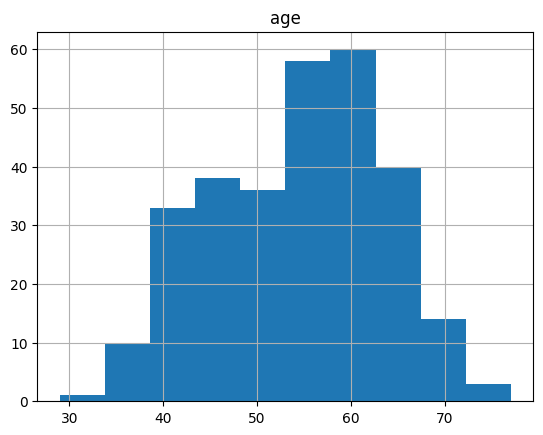

In [38]:
data_filtered.hist('age')
plt.show()

In [39]:
# Рассчитать среднее и медианное число на основе столбца 'age'
mean_age = data_filtered['age'].mean()
median_age = data_filtered['age'].median()
print(mean_age)
print(median_age)

54.255972696245735
55.0


In [40]:
# Общая информация в столбце 'age'
data_filtered['age'].describe()

count    293.000000
mean      54.255973
std        9.095724
min       29.000000
25%       47.000000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

**Заключение:**

- Среднее значение и медиана для возраста составляют 54,255 и 55,0. Можем заметить что наше среднее и медиана почти совпадают, о чем говорит что наше распределение почти нормальное. Можем сказать что в основном на прием ходят люди в возрасте

### trestbps

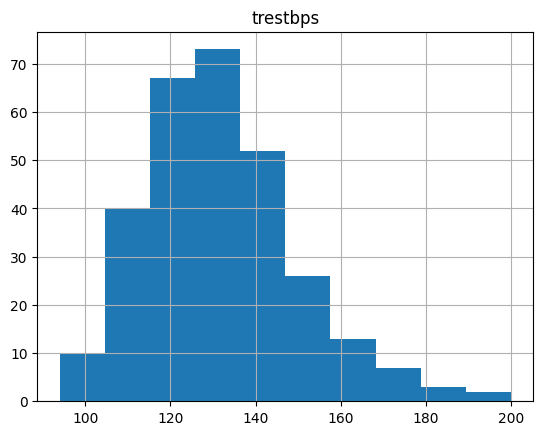

In [41]:
data_filtered.hist('trestbps')
plt.show()

In [42]:
# Рассчитать среднее и медианное число на основе столбца 'trestbps'
mean_trestbps = data_filtered['trestbps'].mean()
median_trestbps = data_filtered['trestbps'].median()
print(mean_trestbps)
print(median_trestbps)

131.36860068259386
130.0


In [43]:
# Общая информация в столбце 'latitude'
data_filtered['trestbps'].describe()

count    293.000000
mean     131.368601
std       17.493657
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

**Заключение:**

- Среднее значение и медиана для артериального давления составляют 130.0 и 131.36. Можно сказать что в основном у людей нет проблем с двалением

### chol

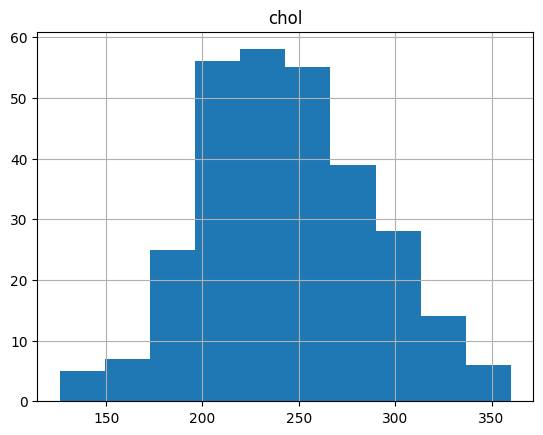

In [44]:
data_filtered.hist('chol')
plt.show()

In [45]:
# Рассчитать среднее и медианное число на основе столбца 'chol'
mean_chol = data_filtered['chol'].mean()
median_chol = data_filtered['chol'].median()
print(mean_chol)
print(median_chol)

243.31058020477815
240.0


In [46]:
# Общая информация в столбце 'chol'
data_filtered['chol'].describe()

count    293.000000
mean     243.310580
std       44.830531
min      126.000000
25%      211.000000
50%      240.000000
75%      273.000000
max      360.000000
Name: chol, dtype: float64

**Заключение:**

- Среднее значение и медиана для уровня холестерина составляют 240.0 и 243.31. Можно сказать что в основном у людей нормальный уровень холестерина

### thalach

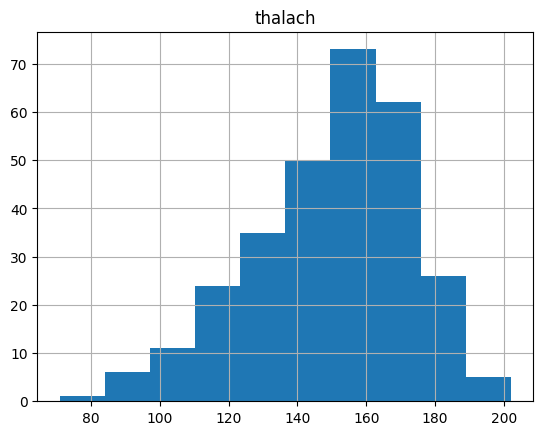

In [47]:
data_filtered.hist('thalach')
plt.show()

In [48]:
# Рассчитать среднее и медианное число на основе столбца 'thalach'
mean_thalach = data_filtered['thalach'].mean()
median_thalach = data_filtered['thalach'].median()
print(mean_thalach)
print(median_thalach)

149.79522184300342
153.0


In [49]:
# Общая информация в столбце 'thalach'
data_filtered['thalach'].describe()

count    293.000000
mean     149.795222
std       23.068667
min       71.000000
25%      133.000000
50%      153.000000
75%      167.000000
max      202.000000
Name: thalach, dtype: float64

**Заключение:**

- Среднее значение и медиана для частоты сердечных скоращений составляют 149.7 и 153.0 Можно сказать что в основном у людей частота сердечных сокращений с нагрузкой в пределах нормы

## Факторы влияющие на диагноз

In [50]:
ranked_features

['cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'danger_level']

В этом разделе будут проанализированы факторы, которые больше всего влияют на цену дома.

Цена зависит от следующих характеристик:

- cp<br>
- fbs<br>
- ranked_features<br>
- exang<br>
- slope	<br>
- ca
- thal
- danger_level
  

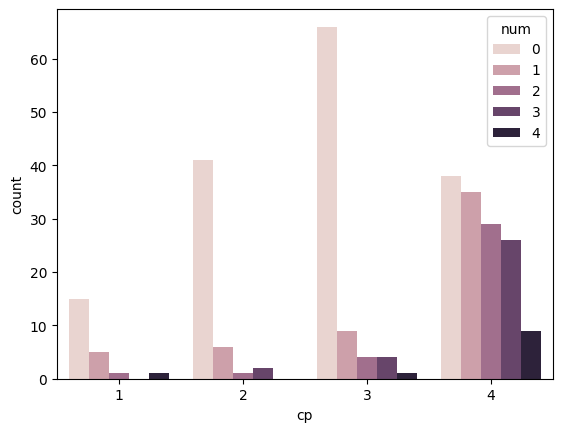

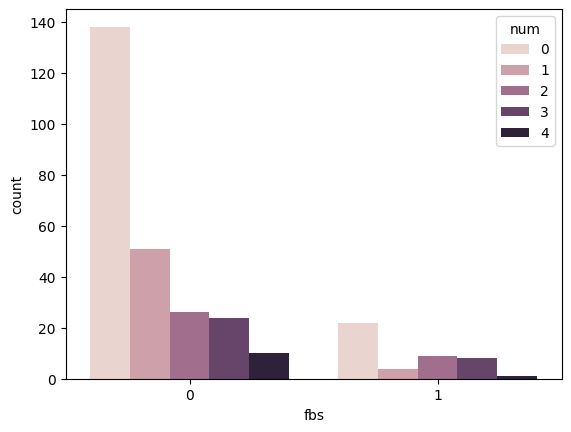

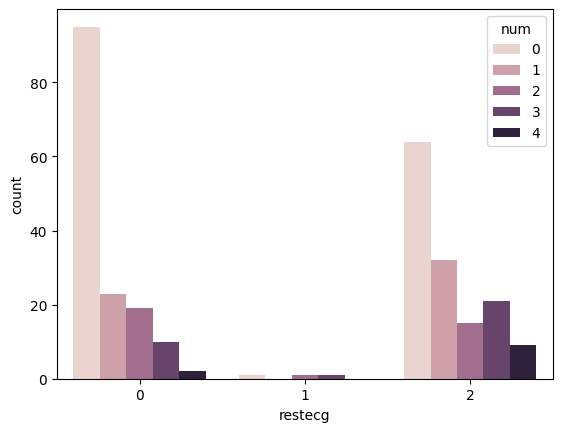

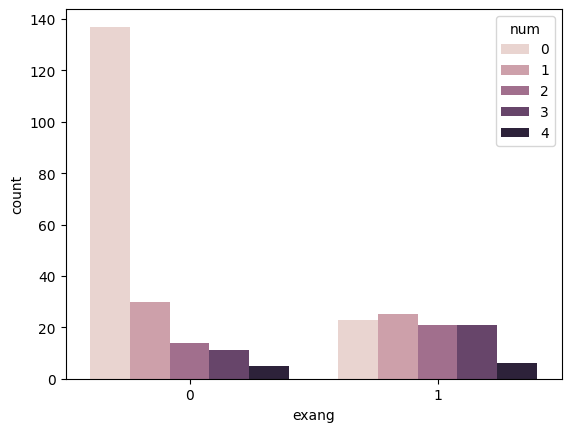

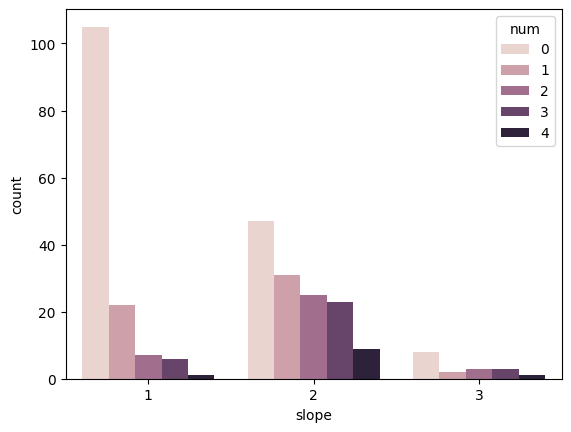

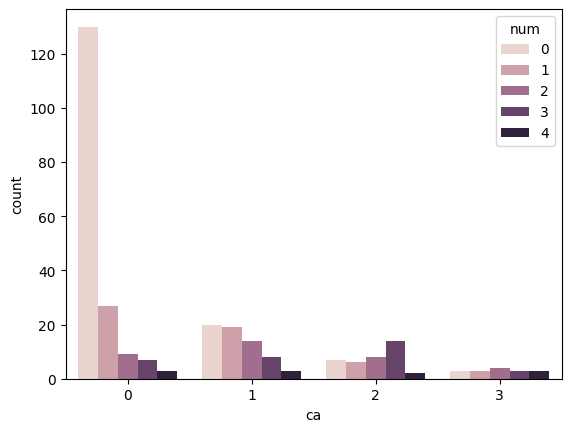

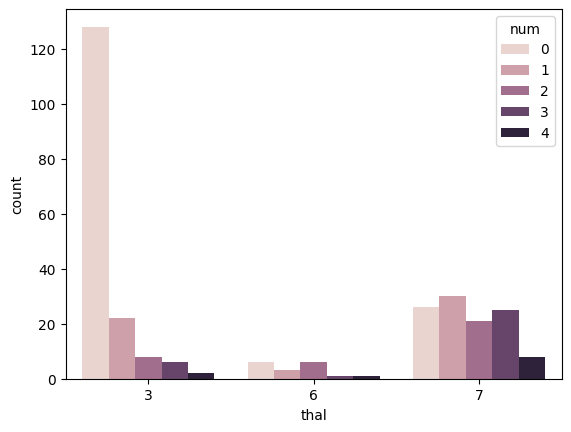

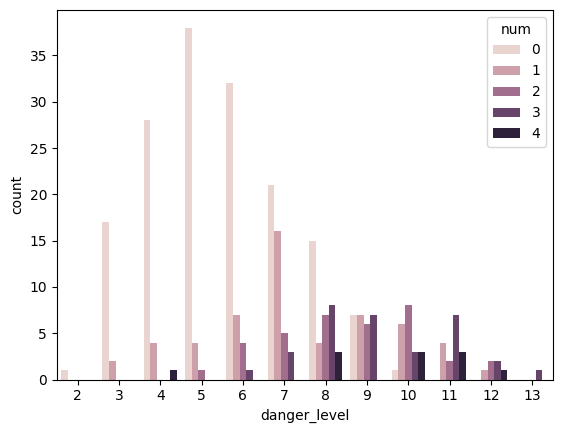

In [51]:
for column in ranked_features:
    sns.countplot(data=data_filtered, x=column, hue='num')
    plt.show()

Заметим что все наши ранговые признаки 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'danger_level' влияют в какой-то степени на уровень диагноза. danger_level очень сильно влияет на исход

In [52]:
# Матрица корреляции
data_filtered.corr(method='spearman')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,the_ratio_of_trestbps_to_chol,danger_level
age,1.000000,-0.074040,0.130031,0.290415,0.176828,0.111333,0.128294,-0.406549,0.107106,0.251529,0.168713,0.397456,0.127883,0.255158,0.027694,0.321650
sex,-0.074040,1.000000,0.055898,-0.050936,-0.135127,0.055034,0.055323,-0.034363,0.138535,0.129142,0.039427,0.119547,0.396997,0.272775,0.079137,0.125175
cp,0.130031,0.055898,1.000000,-0.003808,0.070263,-0.035264,0.100677,-0.373417,0.434282,0.235105,0.198779,0.244792,0.304584,0.473258,-0.069715,0.672042
trestbps,0.290415,-0.050936,-0.003808,1.000000,0.140108,0.156307,0.135942,-0.031213,0.051554,0.128741,0.066067,0.066406,0.094551,0.131106,0.470856,0.113011
chol,0.176828,-0.135127,0.070263,0.140108,1.000000,0.012369,0.154657,-0.041457,0.096981,0.004899,-0.012487,0.133750,0.001976,0.114551,-0.772463,0.158059
fbs,0.111333,0.055034,-0.035264,0.156307,0.012369,1.000000,0.069063,-0.020674,0.032235,0.047942,0.071395,0.138445,0.078581,0.071025,0.071161,0.240050
restecg,0.128294,0.055323,0.100677,0.135942,0.154657,0.069063,1.000000,-0.127369,0.107108,0.093714,0.132841,0.127563,0.014684,0.195887,-0.040428,0.568959
thalach,-0.406549,-0.034363,-0.373417,-0.031213,-0.041457,-0.020674,-0.127369,1.000000,-0.395751,-0.424824,-0.431016,-0.285752,-0.286963,-0.438878,-0.003768,-0.484776
exang,0.107106,0.138535,0.434282,0.051554,0.096981,0.032235,0.107108,-0.395751,1.000000,0.309637,0.287368,0.185482,0.325932,0.440129,-0.043029,0.539375
oldpeak,0.251529,0.129142,0.235105,0.128741,0.004899,0.047942,0.093714,-0.424824,0.309637,1.000000,0.573863,0.251963,0.331716,0.448074,0.076280,0.423391


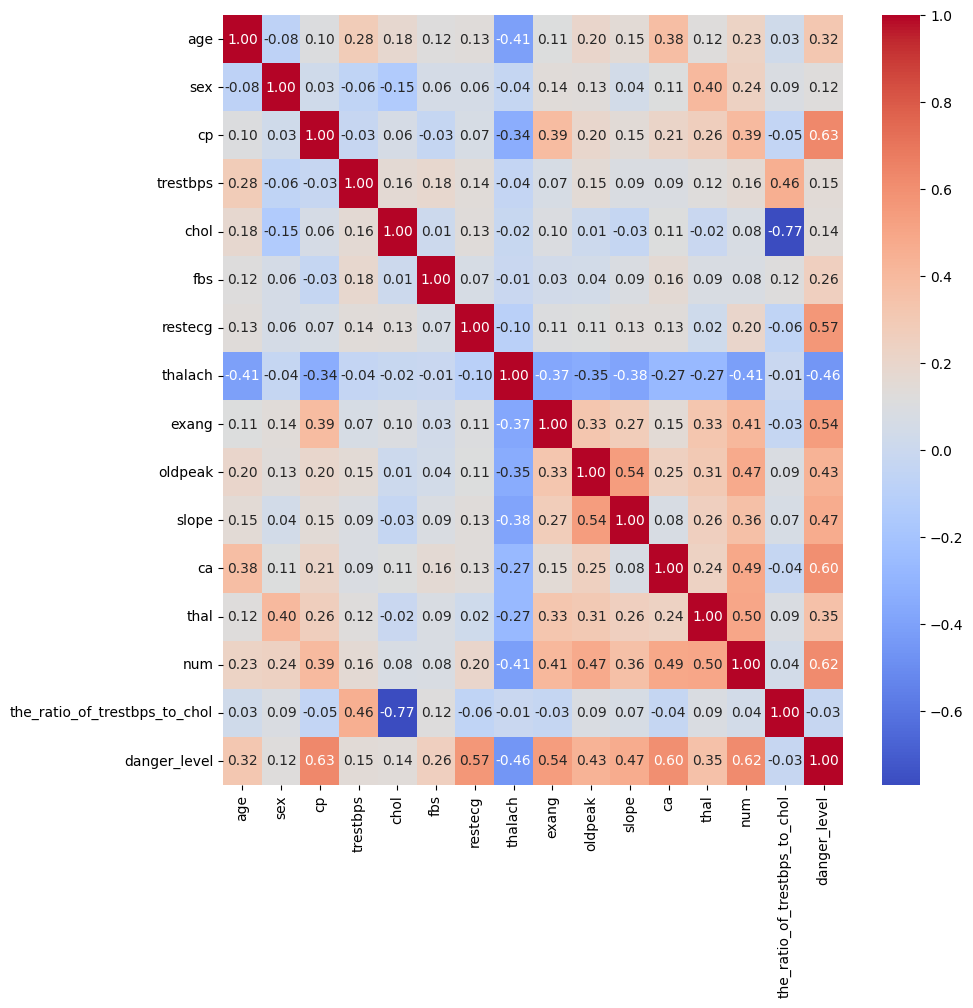

In [53]:
# Матрица корреляции
plt.figure(figsize=(10, 10))
sns.heatmap(data_filtered.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

# Сохранение датасета

In [57]:
data_filtered

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,the_ratio_of_trestbps_to_chol,danger_level
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,0.622318,7
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,0.559441,12
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,0.524017,11
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,0.520000,6
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,0.637255,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1,0.416667,3
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2,0.746114,9
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3,0.992366,8
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1,0.550847,7


In [56]:
data_filtered.to_csv('heart.csv', index=False)

# Общие выводы:

1) Обработка пропусков:

    - В датасете присутствовало 6 пропущенных значений, которые были обработаны медианой по соответствующим признакам

2) В датасете очень мало значений, поэтому сложно судить о выбросах, но, 2 признака все равно были предобрабоны на выбросы

3) Выводы по распределениям всех признаков:

    - Возраст: Больше всего людей с отклонениями находятся в возрасте от 40 до 70 лет

    - Пол: Преобладают мужчины

    - Боль в груди: Основная часть людей не испытавают боль, либо имеют боль, не связанную с ангиной

    - АД: У большей части людей на момент попадания в больницу повышенное АД

    - Холестерин: Основная часть людей имеют показатели холестерина 170-320 мг/дл

    - Сахар в крови: Большая часть людей имеет нормальный уровень сахара в крови (< 120 мг/дл)

    - Результат ЭКГ в покое:  У большинства людей результат экг в норме. Также есть немалая часть людей, результат которых указывает на вероятную или определенную гипертрофию левого желудочка по критериям Эстеса.

    - МЧСС: Основная часть людей имела МЧСС в диапазоне 120 - 180

    - Стенакардия, вызванная физ.нагрузкой: График показал отношение 1:2 (200 чел "да", 100 человек "нет")

    - Депрессия из-за физ. нагрузки: У 120 пациентов не является фактором риска.

    - Наклон верхней точки первого сегмента упражнения У большинства пациентов либо Значение 2: пологий, либо Значение 3: наклон вниз

    - Количество крупных сосудов (0-3): У большинства не имеются таких сосудов

    - Отклонение: Результаты почти поровну: половина пациентов имеет нормальное отклонение, другая половина имеет устраняемый дефект

4) Распределение категориальных признаков в разрезе целевой переменной:

    - Пол: Отклонения у полов наблюдаются в соотношении 1(женщина):2(мужчина)

    - Тип боли в груди: У большинства прогнозов не проявляется симптомов

    - Уровень сахара в крови натощак: Определяется поровну. (0 - 2 тип заболевания)

    - Результаты электрокардиографии в состоянии покоя: Большая часть предсказаний будет иметь аномалию зубца ST-T (инверсия зубца T и/или подъем или спад сегмента ST > 0,05 мВ)

    - Стенокардия, вызванная физической нагрузкой: Диагноз в основном наблюдается у людей, со стенокардией

    - Наклон верхней точки первого сегмента упражнения: Диагноз в основном наблюдается у людей, у которых имеется пологий или нижний наклон

    - Количество крупных сосудов (0-3), окрашенных методом флуороскопии: Диагноз в основном наблюдается у людей, у которых количество таких сосудов равно 2 или 3
    
    - Отклонения: Диагноз в основном наблюдается у людей, у которых исправленный или устраняемый дефекты